In [136]:
import tensorflow as tf

In [137]:
mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist

À l'aide des building blocks suivants :    
- layers.conv2D
- layers.Dropout
- layers.Flatten
- layers.MaxPool2D
- layers.Dense

Créer une architecture CNN afin d'atteindre le score maximum sur le jeu de données MNIST FASHION


In [138]:
X_train_full.shape

(60000, 28, 28)

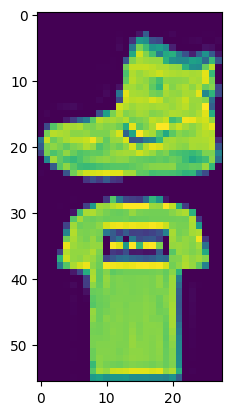

In [139]:
import matplotlib.pyplot as plt 
import numpy as np

image_compare = np.vstack((X_train_full[0], X_train_full[1]))

plt.imshow(image_compare)

In [140]:
from tensorflow import keras

In [141]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
keras.utils.set_random_seed(42)

In [142]:
def map_label(label):
    label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    return label_names[label]
mnist =  keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.
num_labels = len(np.unique(y_train))

In [143]:
initializer = tf.keras.initializers.HeNormal(seed=42)
regularisateur = tf.keras.regularizers.L1L2(l1=1e-3,l2=1e-2)

In [144]:
inputs = keras.layers.Input(shape=(28,28,1))
conv2d_1 = keras.layers.Conv2D(filters=64,padding="same",kernel_size=4,activation='relu')(inputs)
maxpool_1=keras.layers.MaxPooling2D(pool_size=2)(conv2d_1)
conv2d_2 = keras.layers.Conv2D(filters=128,padding="same",kernel_size=4,activation='relu')(maxpool_1)
maxpool_2=keras.layers.MaxPooling2D(pool_size=2)(conv2d_2)
conv2d_3 = keras.layers.Conv2D(filters=256,padding="same",kernel_size=3,activation='relu')(maxpool_2)
maxpool_3=keras.layers.MaxPooling2D(pool_size=2)(conv2d_3)
global_avg = keras.layers.GlobalAveragePooling2D()(maxpool_3)
dense = keras.layers.Dense(64, activation='relu')(global_avg)
drop_dense = keras.layers.Dropout(0.1)(dense)
outputs = keras.layers.Dense(num_labels, activation='softmax')(drop_dense)


In [145]:
model = keras.models.Model(inputs=inputs, outputs=outputs)

In [146]:
opt = keras.optimizers.Adam(learning_rate=0.001)
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True),
]
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

In [147]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        1088      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       131200    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         295168

In [148]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),batch_size=32,
                    callbacks=my_callbacks)

Epoch 1/30
1719/1719 [==============================] - 92s 53ms/step - loss: 0.6091 - accuracy: 0.7724 - val_loss: 0.3723 - val_accuracy: 0.8706
Epoch 2/30
1719/1719 [==============================] - 89s 52ms/step - loss: 0.3544 - accuracy: 0.8723 - val_loss: 0.2935 - val_accuracy: 0.8928
Epoch 3/30
1719/1719 [==============================] - 90s 53ms/step - loss: 0.2923 - accuracy: 0.8952 - val_loss: 0.2623 - val_accuracy: 0.9044
Epoch 4/30
1719/1719 [==============================] - 90s 52ms/step - loss: 0.2552 - accuracy: 0.9066 - val_loss: 0.2431 - val_accuracy: 0.9106
Epoch 5/30
1719/1719 [==============================] - 90s 52ms/step - loss: 0.2299 - accuracy: 0.9157 - val_loss: 0.2250 - val_accuracy: 0.9178
Epoch 6/30
1719/1719 [==============================] - 90s 52ms/step - loss: 0.2076 - accuracy: 0.9239 - val_loss: 0.2265 - val_accuracy: 0.9166
Epoch 7/30
1719/1719 [==============================] - 91s 53ms/step - loss: 0.1890 - accuracy: 0.9308 - val_loss: 0.2224 -

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.2378 - accuracy: 0.9163


[0.23777686059474945, 0.9162999987602234]

In [ ]:
model.save("my_height_keras_model.h5")